In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
df = df.drop(columns=['day', 'month', 'year'])

In [40]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [42]:
df['Classes'].replace({'fire' : 1, 'not fire': 0}, inplace=True)

In [43]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [44]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train.shape

(182, 11)

In [47]:
X_test.shape

(61, 11)

### Feature Selection Based On Correlation

In [48]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [49]:
## Check  for multi collinearity

<Axes: >

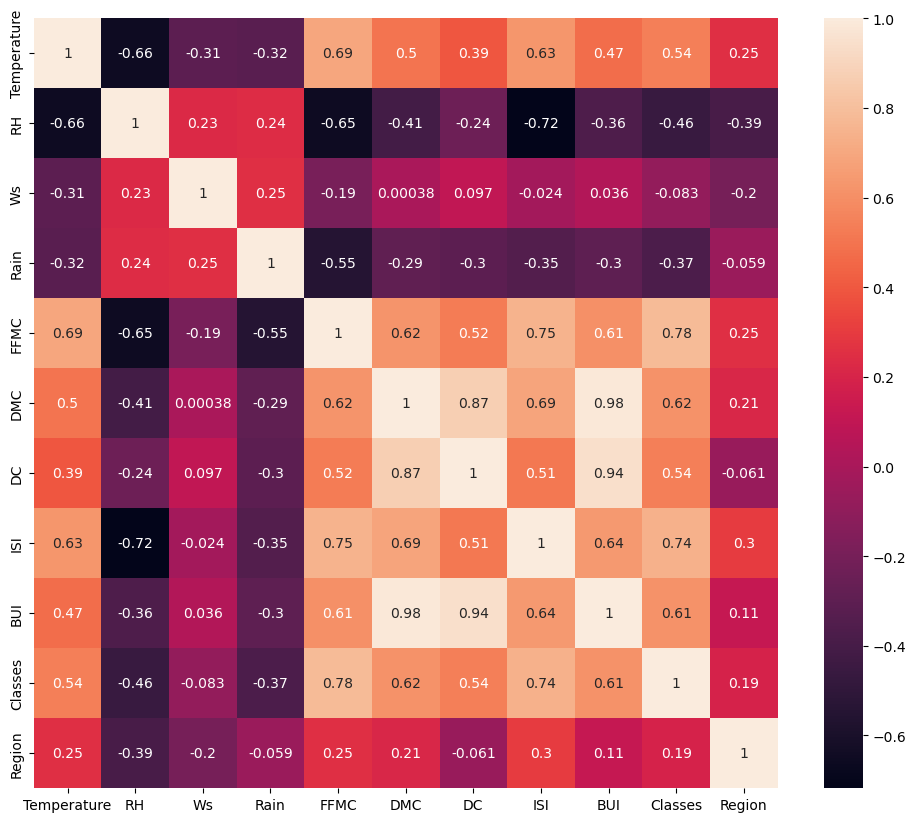

In [50]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [51]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [52]:
# treshold sets by domain expert
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [53]:
### drop features when ccorrelation is more than 0.85
X_train.drop(columns=['BUI', 'DC'], inplace=True)
X_test.drop(columns=['BUI', 'DC'], inplace=True)

In [54]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

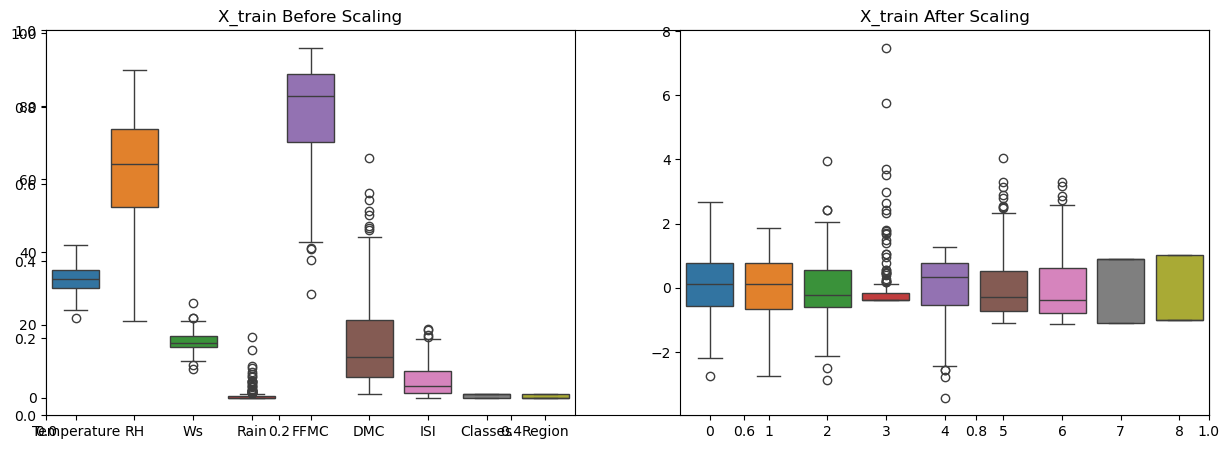

In [56]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

### Linear Regression Model

In [60]:
linearreg = LinearRegression()
linearreg.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
y_pred = linearreg.predict(X_test_scaled)

In [64]:
mean_absolute_error(y_test, y_pred)

0.9939450225331384

In [65]:
r2_score(y_test, y_pred)

0.9607056657860651

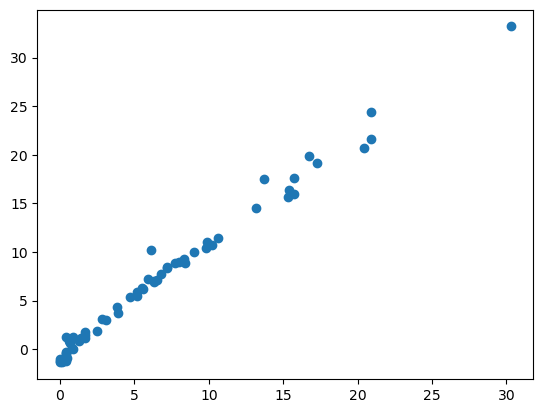

In [66]:
plt.scatter(y_test, y_pred)

### Lasso Regression Model

In [68]:
lassoreg = Lasso()
lassoreg.fit(X_train_scaled, y_train)

Lasso()

In [69]:
y_pred = lassoreg.predict(X_test_scaled)

In [70]:
mean_absolute_error(y_test, y_pred)

0.9605020166901075

In [71]:
r2_score(y_test, y_pred)

0.9692970913627958

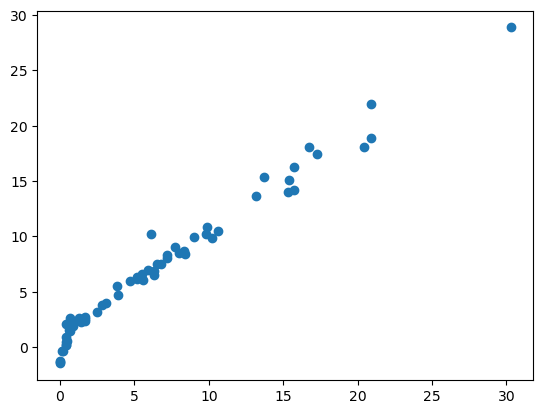

In [72]:
plt.scatter(y_test, y_pred)

### Ridge Regression Model

In [75]:
linerredge = Ridge()
linerredge.fit(X_train_scaled, y_train)

Ridge()

In [76]:
y_pred = linerredge.predict(X_test_scaled)

In [77]:
mean_absolute_error(y_test, y_pred)

0.9862070802884408

In [78]:
r2_score(y_test, y_pred)

0.9616458508455313

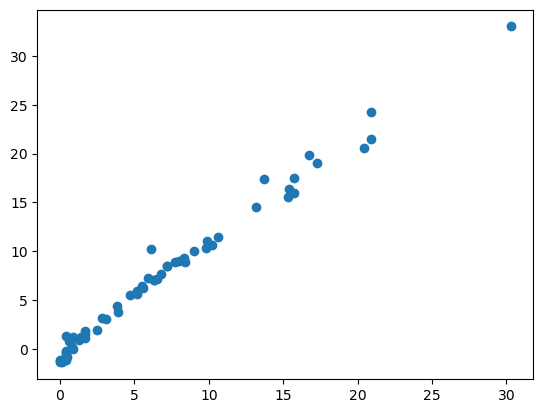

In [79]:
plt.scatter(y_test, y_pred)

In [80]:
# Hyper-parameter Tunning

In [81]:
from sklearn.linear_model import LassoCV

In [82]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [87]:
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

In [84]:
lasso_cv.alpha_

np.float64(0.05725391318234408)

In [85]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [86]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

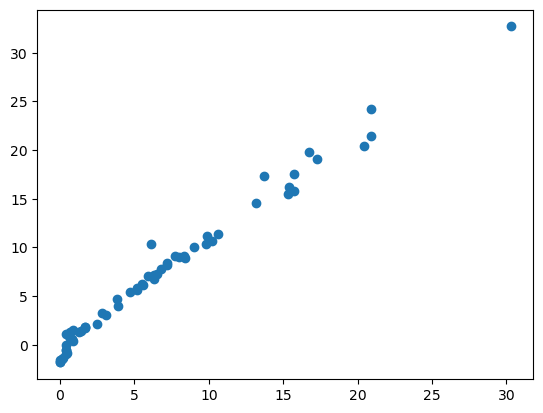

In [88]:
plt.scatter(y_test, y_pred_lasso_cv)

In [89]:
from sklearn.linear_model import RidgeCV

In [90]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [91]:
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

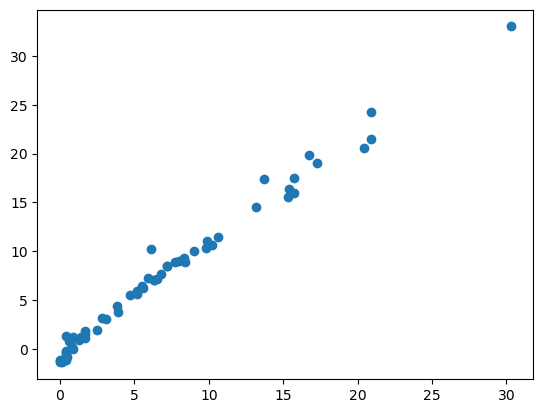

In [92]:
plt.scatter(y_test, y_pred_ridge_cv)

In [93]:
mean_absolute_error(y_test, y_pred_ridge_cv)

0.9862070802884408

In [94]:
r2_score(y_test, y_pred_ridge_cv)

0.9616458508455313

In [95]:
ridge_cv.alpha_

np.float64(1.0)

In [96]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [98]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [99]:
from sklearn.linear_model import ElasticNetCV

In [100]:
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [101]:
y_pred_elastic_cv = elastic_cv.predict(X_test_scaled)

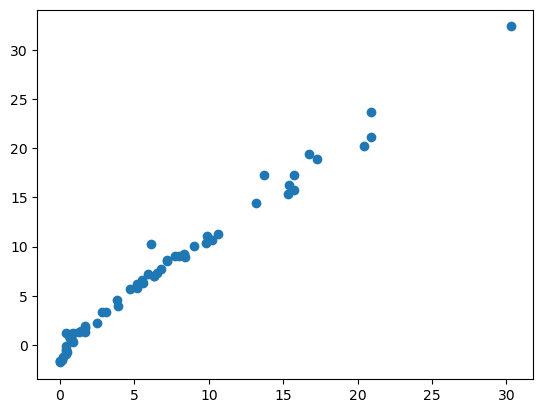

In [102]:
plt.scatter(y_test, y_pred_elastic_cv)

In [103]:
r2_score(y_test, y_pred_elastic_cv)

0.9635664846226284

In [104]:
mean_absolute_error(y_test, y_pred_elastic_cv)

0.9658446127981586